<a href="https://colab.research.google.com/github/Kasper-Raupach-Haurum/M1-Project/blob/main/Main%20project%20colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#The standard imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#The imports for EDA
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

#The imports for model selection
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

#The imports for model configuration
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

#The imports for model evaluation
from sklearn.metrics import confusion_matrix , accuracy_score ,classification_report

#The imports for model significance estimator
from sklearn.inspection import permutation_importance

In [ ]:
HR = pd.read_csv('https://github.com/Kasper-Raupach-Haurum/M1-Project/raw/Kasper-Raupach-Haurum-patch-1/general_data.csv', low_memory=False, sep=',')
HR1 = pd.read_excel('https://github.com/Kasper-Raupach-Haurum/M1-Project/blob/Kasper-Raupach-Haurum-patch-1/data_dictionary.xlsx?raw=true')
HR2 = pd.read_csv('https://github.com/Kasper-Raupach-Haurum/M1-Project/raw/Kasper-Raupach-Haurum-patch-1/employee_survey_data.csv', low_memory=False, sep=',')
HR3 = pd.read_csv('https://github.com/Kasper-Raupach-Haurum/M1-Project/raw/Kasper-Raupach-Haurum-patch-1/manager_survey_data.csv', low_memory=False, sep=',')

#We are going to start this off by importing the libaries that will be used, and lastly, uploading the csv.file from my Github

## Loading up the datasets, and doing a quick showing

Incase it looks very confusing, this is a summary of the datasets currently in action after I started the work by importing them in the start:

HR: General data sheet
HR1: Data dictionary
HR2: Employee survey data
HR3: Manager survey data

In [ ]:
HR.head()
#We will now conduct a .head command to make a overview of how the data looks like. It looks like data, (what???)

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,0.0,Y,23,8,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,1.0,Y,15,8,3,5.0,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,3.0,Y,11,8,3,13.0,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,4.0,Y,12,8,2,9.0,2,6,0,4


In [ ]:
HR.info()
#Next up there will be a .info command to gain additional information about the current data points in the sheet.
#As seen, something funky is going on at NumCompaniesWorked, and TotalWorkingYears. Nothing too crazy, but there are some N/A

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4410 non-null   int64  
 1   Attrition                4410 non-null   object 
 2   BusinessTravel           4410 non-null   object 
 3   Department               4410 non-null   object 
 4   DistanceFromHome         4410 non-null   int64  
 5   Education                4410 non-null   int64  
 6   EducationField           4410 non-null   object 
 7   EmployeeCount            4410 non-null   int64  
 8   EmployeeID               4410 non-null   int64  
 9   Gender                   4410 non-null   object 
 10  JobLevel                 4410 non-null   int64  
 11  JobRole                  4410 non-null   object 
 12  MaritalStatus            4410 non-null   object 
 13  MonthlyIncome            4410 non-null   int64  
 14  NumCompaniesWorked      

In [ ]:
HR1.head()

,Variable,Meaning,Levels
0,Age,Age of the employee,NaN
1,Attrition,Whether the employee left in the previous year...,NaN
2,BusinessTravel,How frequently the employees travelled for bus...,NaN
3,Department,Department in company,NaN
4,DistanceFromHome,Distance from home in kms,NaN


In [ ]:
HR1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Variable  30 non-null     object
 1   Meaning   30 non-null     object
 2   Levels    29 non-null     object
dtypes: object(3)
memory usage: 1.3+ KB


In [ ]:
HR2.head()

,EmployeeID,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
0,1,3.0,4.0,2.0
1,2,3.0,2.0,4.0
2,3,2.0,2.0,1.0
3,4,4.0,4.0,3.0
4,5,4.0,1.0,3.0


In [ ]:
HR2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   EmployeeID               4410 non-null   int64  
 1   EnvironmentSatisfaction  4385 non-null   float64
 2   JobSatisfaction          4390 non-null   float64
 3   WorkLifeBalance          4372 non-null   float64
dtypes: float64(3), int64(1)
memory usage: 137.9 KB


In [ ]:
HR3.head()

,EmployeeID,JobInvolvement,PerformanceRating
0,1,3,3
1,2,2,4
2,3,3,3
3,4,2,3
4,5,3,3


In [ ]:
HR3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   EmployeeID         4410 non-null   int64
 1   JobInvolvement     4410 non-null   int64
 2   PerformanceRating  4410 non-null   int64
dtypes: int64(3)
memory usage: 103.5 KB


## Merging the datasets into 1

To get to work it will be best to merged all the datasets into one single dataframe, as otherwise it will be a circus show. To start off, we will merged the main dataset with employee survey, and then the newly merged dataset with manager survey data. A good reason why that is possible is that they all have EmployeeID in common, meaning there will be the same amount of staff in all the surveys

In [ ]:
MergedHR = pd.merge(HR, HR2)

In [ ]:
DataHR = pd.merge(MergedHR, HR3)

In [ ]:
DataHR.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4410 entries, 0 to 4409
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4410 non-null   int64  
 1   Attrition                4410 non-null   object 
 2   BusinessTravel           4410 non-null   object 
 3   Department               4410 non-null   object 
 4   DistanceFromHome         4410 non-null   int64  
 5   Education                4410 non-null   int64  
 6   EducationField           4410 non-null   object 
 7   EmployeeCount            4410 non-null   int64  
 8   EmployeeID               4410 non-null   int64  
 9   Gender                   4410 non-null   object 
 10  JobLevel                 4410 non-null   int64  
 11  JobRole                  4410 non-null   object 
 12  MaritalStatus            4410 non-null   object 
 13  MonthlyIncome            4410 non-null   int64  
 14  NumCompaniesWorked      

## Data cleaning

We wil conduct data cleaning on the dataframework. This is done to remove the missing values, and other N/A in the answer inputs. Likewise it will also be done to remove either intentional, or unitentional typing errors.

At a later date this will allow us to drop datapoints if we deem it beneficial for the EDA

In [ ]:
DataHR.isna().sum()
#We will now do a quick search for the values that is missing. 
#As it can be seen, there is quite a few missing points in the DataHR


Age                         0
Attrition                   0
BusinessTravel              0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeID                  0
Gender                      0
JobLevel                    0
JobRole                     0
MaritalStatus               0
MonthlyIncome               0
NumCompaniesWorked         19
Over18                      0
PercentSalaryHike           0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           9
TrainingTimesLastYear       0
YearsAtCompany              0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
EnvironmentSatisfaction    25
JobSatisfaction            20
WorkLifeBalance            38
JobInvolvement              0
PerformanceRating           0
dtype: int64

In [ ]:
DataHR.dropna()
#As we found out there are some N/As in the DataHR, so now we are going to send them away by using the dropna. command. As there are not larger amounts it will not have a greater influence on the overall datafram as a whole

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,1.0,6,1,0,0,3.0,4.0,2.0,3,3
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,6.0,3,5,1,4,3.0,2.0,4.0,2,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,5.0,2,5,0,3,2.0,2.0,1.0,3,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,13.0,5,8,7,5,4.0,4.0,3.0,2,3
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,9.0,2,6,0,4,4.0,1.0,3.0,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4404,29,No,Travel_Rarely,Sales,4,3,Other,1,4405,Female,...,6.0,2,6,1,5,3.0,4.0,3.0,2,3
4405,42,No,Travel_Rarely,Research & Development,5,4,Medical,1,4406,Female,...,10.0,5,3,0,2,4.0,1.0,3.0,3,3
4406,29,No,Travel_Rarely,Research & Development,2,4,Medical,1,4407,Male,...,10.0,2,3,0,2,4.0,4.0,3.0,2,3
4407,25,No,Travel_Rarely,Research & Development,25,2,Life Sciences,1,4408,Male,...,5.0,4,4,1,2,1.0,3.0,3.0,3,4


In [ ]:
DataHR.shape
#We will now do a .shape command to find the amount of variables, and the number of respondants to it. 
#As revealed, there are 29 different variables, and 4410 number of respondants to the data points.

(4410, 29)

However looking at these numbers might be somewhat abstract for the non-technical mind, so next up we will construct a descriptor for the DataHR to show the means, amounts, and variables, this is done by using the .describe command. We will also transpose this so we can get the invidual colums on the side, this is by using .T

In [ ]:
DataHR.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,4410.0,36.923810,9.133301,18.0,30.00,36.0,43.00,60.0
DistanceFromHome,4410.0,9.192517,8.105026,1.0,2.00,7.0,14.00,29.0
Education,4410.0,2.912925,1.023933,1.0,2.00,3.0,4.00,5.0
EmployeeCount,4410.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeID,4410.0,2205.500000,1273.201673,1.0,1103.25,2205.5,3307.75,4410.0
JobLevel,4410.0,2.063946,1.106689,1.0,1.00,2.0,3.00,5.0
MonthlyIncome,4410.0,65029.312925,47068.888559,10090.0,29110.00,49190.0,83800.00,199990.0
NumCompaniesWorked,4391.0,2.694830,2.498887,0.0,1.00,2.0,4.00,9.0
PercentSalaryHike,4410.0,15.209524,3.659108,11.0,12.00,14.0,18.00,25.0
StandardHours,4410.0,8.000000,0.000000,8.0,8.00,8.0,8.00,8.0


#Quick summary over the data collected

bla, bla bla

##Checking for values

I have the assumption that due to the fact there are the same amount of replies to the data on the variables, there are some variables that are not necessary to be used in the Dataframe. To ensure that, I will now be running a set of checks

In [ ]:
DataHR.EmployeeCount.unique()

array([1])

In [ ]:
DataHR.Over18.unique()

array(['Y'], dtype=object)

In [ ]:
DataHR.StandardHours.unique()

array([8])

In [ ]:
DataHR.EmployeeID.unique()

array([   1,    2,    3, ..., 4408, 4409, 4410])

In [ ]:
DataHR.MonthlyIncome.value_counts

<bound method IndexOpsMixin.value_counts of 0       131160
1        41890
2       193280
3        83210
4        23420
         ...  
4405     60290
4406     26790
4407     37020
4408     23980
4409     54680
Name: MonthlyIncome, Length: 4410, dtype: int64>

What we can see is the fact there are no different answers in the three categories, that is they are 4010 employees, all are over 18, and they all work 8 hours. As such, we will now drop those datapoints as they have no impact on the EDA, and overall are irrelevant.

In [ ]:
DataHR.drop(['EmployeeCount', 'Over18', 'StandardHours'], axis="columns", inplace=True)
#Fire in the hole, say bye-bye to those datapoints

In [ ]:
DataHRNew = DataHR.drop_duplicates(subset = ['Age', 'Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome', 'Education', 'EducationField', 'Gender', 'JobLevel', 'JobRole', 'MaritalStatus', 'MonthlyIncome', 'NumCompaniesWorked', 'PercentSalaryHike', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager'])

In [ ]:
DataHRNew.shape

(1498, 26)

In [ ]:
DataHRNew.info()
#And this is how it looks like now

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1498 entries, 0 to 4409
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      1498 non-null   int64  
 1   Attrition                1498 non-null   object 
 2   BusinessTravel           1498 non-null   object 
 3   Department               1498 non-null   object 
 4   DistanceFromHome         1498 non-null   int64  
 5   Education                1498 non-null   int64  
 6   EducationField           1498 non-null   object 
 7   EmployeeID               1498 non-null   int64  
 8   Gender                   1498 non-null   object 
 9   JobLevel                 1498 non-null   int64  
 10  JobRole                  1498 non-null   object 
 11  MaritalStatus            1498 non-null   object 
 12  MonthlyIncome            1498 non-null   int64  
 13  NumCompaniesWorked       1479 non-null   float64
 14  PercentSalaryHike       

## Extra EDA part - Correlated variables contributing to attrition

As attrition is a problem for any workplace we will now create a heatmap over the correlated values that is contributing to the attrition rate at the company. This is done so we can get a overview of what variables has the biggest impact to attrition rate.

In [ ]:
DataHRNew.head()
#First of all, we are going to make a quick .head command to check out our current Dataframe, and it looks fine

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeID,Gender,JobLevel,...,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,Female,1,...,1.0,6,1,0,0,3.0,4.0,2.0,3,3
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,2,Female,1,...,6.0,3,5,1,4,3.0,2.0,4.0,2,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,3,Male,4,...,5.0,2,5,0,3,2.0,2.0,1.0,3,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,4,Male,3,...,13.0,5,8,7,5,4.0,4.0,3.0,2,3
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,5,Male,1,...,9.0,2,6,0,4,4.0,1.0,3.0,3,3


In [ ]:
df = DataHRNew.copy()
#We are making a copy of the DataHRNew to start calculating out the correlated values, and encoding them.

In [ ]:
Attrition_le = LabelEncoder()
BusinessTravel_le = LabelEncoder()
Department_le = LabelEncoder()
EducationField_le = LabelEncoder()
Gender_le = LabelEncoder()
JobRole_le = LabelEncoder()
MaritalStatus_le = LabelEncoder()
Over18_le = LabelEncoder()
OverTime_le = LabelEncoder()
#This is encoding the variables for the purposes of implementing them into a fit_transform command

In [ ]:
df['Attrition'] = Attrition_le.fit_transform(df['Attrition'])
df['BusinessTravel'] = BusinessTravel_le.fit_transform(df['BusinessTravel'])
df['Department'] = Department_le.fit_transform(df['Department'])
df['EducationField'] = EducationField_le.fit_transform(df['EducationField'])
df['Gender'] = Gender_le.fit_transform(df['Gender'])
df['JobRole'] = JobRole_le.fit_transform(df['JobRole'])
df['MaritalStatus'] = MaritalStatus_le.fit_transform(df['MaritalStatus'])
#And here we go.

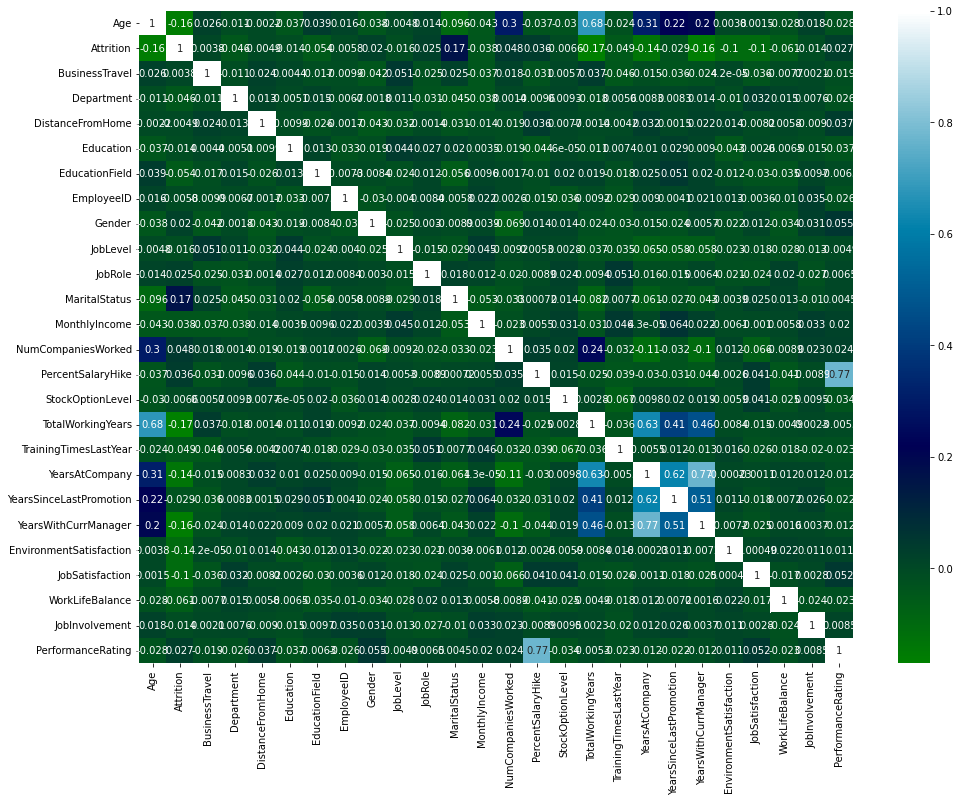

In [ ]:
plt.figure(figsize = (16 ,12))
sns.heatmap(df.corr() ,cmap = 'ocean' , cbar = True , annot = True)
#Using seabon we will now create a heatmap over the encoded values, and setting the size, annotations and putting it below.

Ah, so the more blue the boxes, the more it contributes to the attrition rate. As seen, there are a few different categories which has a correlating factor to each together, such as age and working years, and Percentsalary hike and performance rating.

In [ ]:
round(abs(df.corr()['Attrition']*100).sort_values(ascending=False), 2)
#As we want to focus on looking at the correlated values relating to attrition rate, we will now make a corr. command targetting the variable. Result will be seen below in procentage

Attrition                  100.00
TotalWorkingYears           16.99
MaritalStatus               16.51
YearsWithCurrManager        15.66
Age                         15.62
YearsAtCompany              13.63
JobSatisfaction             10.49
EnvironmentSatisfaction     10.39
WorkLifeBalance              6.14
EducationField               5.38
TrainingTimesLastYear        4.89
NumCompaniesWorked           4.82
Department                   4.55
MonthlyIncome                3.84
PercentSalaryHike            3.61
YearsSinceLastPromotion      2.92
PerformanceRating            2.74
JobRole                      2.50
Gender                       1.97
JobLevel                     1.61
Education                    1.42
JobInvolvement               1.38
StockOptionLevel             0.66
EmployeeID                   0.58
DistanceFromHome             0.49
BusinessTravel               0.38
Name: Attrition, dtype: float64

## Supervised machine learning

We will now begin with the tough stuff, namely programming supervised machine learning, more specifically random tree, etc. 
This is the real deal.

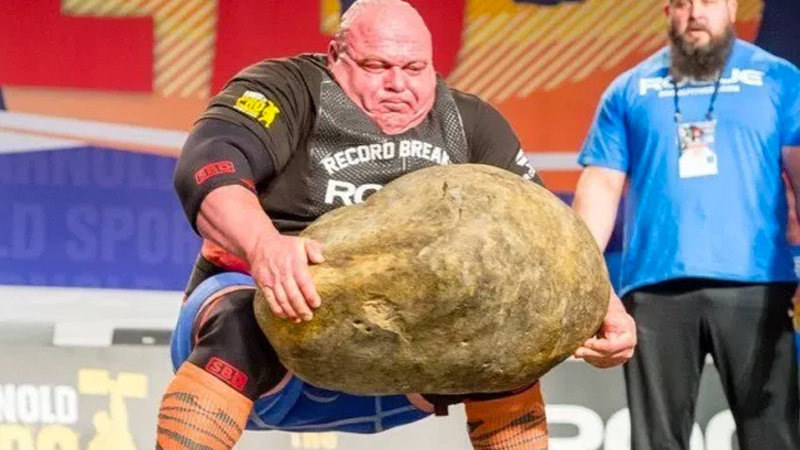

In this supervised machine learning, we will be utilizing three points of measurement:


1.   Logistic regression
2.   Random forrest classifier
3.   Decision tree classifier

Using these three measurements, we will make the foundation if we can accurately predict, or not according to the accumulated data gathered

In [ ]:
x = df.drop('Attrition' ,axis =1)
y = df['Attrition']

print(x.shape ,y.shape)

(1498, 25) (1498,)


In [ ]:
df.Attrition.value_counts()

NameError: ignored

In [ ]:
x_train , x_test , y_train ,y_test = train_test_split(x , y, test_size=0.2 , random_state= 52)
print(x_train.shape)
#After we select our sample size we will now define our machine learning target to be at 80%, therefore we will lose 20% of the overall sample population from "DataHRNew"
#This leads us to arrive at a new sample size for the machine learning, which as 1152

(1152, 25)


In [ ]:
#scaling the data 
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)


x_train

array([[-0.20221254,  0.58572966,  1.37274905, ..., -2.48949962,
        -0.97986371, -0.42891387],
       [-0.20221254,  0.58572966, -0.50540642, ...,  0.34159965,
        -2.36320071, -0.42891387],
       [-1.64085148,  0.58572966, -0.50540642, ...,  0.34159965,
        -0.97986371, -0.42891387],
       ...,
       [ 0.35111013,  0.58572966,  1.37274905, ...,  0.34159965,
        -0.97986371, -0.42891387],
       [-0.86619974,  0.58572966,  1.37274905, ...,  0.34159965,
         0.40347329, -0.42891387],
       [ 1.12576187,  0.58572966, -0.50540642, ...,  0.34159965,
         0.40347329, -0.42891387]])

In [ ]:
k = KFold(n_splits = 5)

In [ ]:
lr_model = LogisticRegression()
lr_score = cross_val_score(lr_model , x_train , y_train ,cv = k ,scoring = 'neg_mean_squared_error')
lr_score.mean()

-0.16578580839450405

In [ ]:
rf_model = RandomForestClassifier()
rf_score = cross_val_score(rf_model , x_train , y_train ,cv = k ,scoring = 'neg_mean_squared_error')
rf_score.mean()

-0.16751364577451533

In [ ]:
dt_model = DecisionTreeClassifier()
dt_score = cross_val_score(dt_model , x_train , y_train ,cv = k ,scoring = 'neg_mean_squared_error')
dt_score.mean()

-0.2578016186711839

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Neg Mean square error')

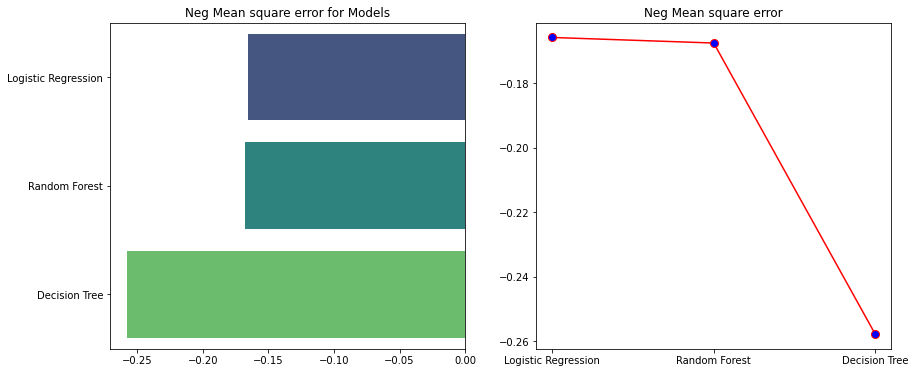

In [ ]:
plt.figure(figsize = (14 , 6))
plt.subplot(1,2,1)
x = ['Logistic Regression','Random Forest' ,'Decision Tree']
y = [lr_score.mean() , rf_score.mean() , dt_score.mean()]
plt.title('Neg Mean square error for Models')
sns.barplot(y,x,palette="viridis")

plt.subplot(1,2,2)
plt.plot(x ,y,marker = 'o' ,color = 'r',mfc ='b' ,ms =8 )
plt.title('Neg Mean square error')

In [ ]:
model_params ={
    'RandomForestClassifier':
    {
        'model':RandomForestClassifier(),
        'param':
        {
         'n_estimators':[10 ,50 ,100,130],
         'criterion':['gini' ,'entropy'],
         'max_depth':range(4,8,1),
         'max_features':['auto' ,'log2']
        }
    },
    'SVC':
    {
        'model':SVC(),
        'param':
        {
            'C':[1,20],
            'gamma':[1,0.1],
            'kernel':['rbf']     
        }
    }
}

In [ ]:
scores =[]
for model_name , mp in model_params.items():
    model_sel = GridSearchCV(estimator= mp['model'] ,param_grid= mp['param'] ,cv = 4 ,return_train_score=False)
    model_sel.fit(x_train,y_train)
    
    scores.append({
        'model':model_name,
        'best_score':model_sel.best_score_,
        'best_params':model_sel.best_params_
    })

In [ ]:
scores

[{'model': 'RandomForestClassifier',
  'best_score': 0.8368055555555556,
  'best_params': {'criterion': 'entropy',
   'max_depth': 5,
   'max_features': 'auto',
   'n_estimators': 10}},
 {'model': 'SVC',
  'best_score': 0.8350694444444444,
  'best_params': {'C': 20, 'gamma': 0.1, 'kernel': 'rbf'}}]

As seen, the most accurate model is the RandomForestClassifier with a 83.6% accuracy, in comparison to the 83.5% score from the SVC

In [ ]:
rf_model = SVC(C=20 ,gamma=0.1 ,kernel='rbf')
rf_model.fit(x_train ,y_train)
ytest_pred = rf_model.predict(x_test)
ytrain_pred = rf_model.predict(x_train)
accuracy_score(y_test ,ytest_pred)

0.8680555555555556

In [ ]:
print(classification_report(y_test , ytest_pred))

              precision    recall  f1-score   support

           0       0.89      0.97      0.93       251
           1       0.47      0.19      0.27        37

    accuracy                           0.87       288
   macro avg       0.68      0.58      0.60       288
weighted avg       0.84      0.87      0.84       288



In [ ]:
print(classification_report(y_train , ytrain_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       957
           1       1.00      1.00      1.00       195

    accuracy                           1.00      1152
   macro avg       1.00      1.00      1.00      1152
weighted avg       1.00      1.00      1.00      1152



## Determinating the most signifiance variables, based on supervised machine learning results

In [ ]:
from sklearn.inspection import permutation_importance
perm_importance = permutation_importance(rf_model, x_test, y_test)

In [ ]:
perm_importance

{'importances_mean': array([ 8.33333333e-03, -1.38888889e-03, -5.55555556e-03,  8.33333333e-03,
         4.16666667e-03,  4.16666667e-03,  2.77777778e-03,  4.16666667e-03,
        -6.94444444e-04,  2.08333333e-03,  2.77777778e-03, -1.38888889e-03,
        -2.77777778e-03, -3.47222222e-03, -1.38888889e-03,  2.22044605e-17,
        -1.38888889e-03, -6.94444444e-04, -6.94444444e-04,  5.55555556e-03,
        -6.25000000e-03,  9.02777778e-03, -9.02777778e-03, -6.94444444e-04,
        -8.33333333e-03]),
 'importances_std': array([0.00894729, 0.00680414, 0.00644001, 0.00470995, 0.00460642,
        0.0051031 , 0.00673289, 0.00555556, 0.00259837, 0.00714974,
        0.00597384, 0.00170103, 0.00833333, 0.00310565, 0.00564169,
        0.0087841 , 0.00470995, 0.00404927, 0.00803878, 0.00354099,
        0.0051031 , 0.00564169, 0.00564169, 0.00259837, 0.00354099]),
 'importances': array([[ 0.00347222,  0.02083333,  0.        ,  0.01736111,  0.        ],
        [-0.00347222, -0.01041667,  0.01041667

In [ ]:
perm_importance.importances_mean

array([ 8.33333333e-03, -1.38888889e-03, -5.55555556e-03,  8.33333333e-03,
        4.16666667e-03,  4.16666667e-03,  2.77777778e-03,  4.16666667e-03,
       -6.94444444e-04,  2.08333333e-03,  2.77777778e-03, -1.38888889e-03,
       -2.77777778e-03, -3.47222222e-03, -1.38888889e-03,  2.22044605e-17,
       -1.38888889e-03, -6.94444444e-04, -6.94444444e-04,  5.55555556e-03,
       -6.25000000e-03,  9.02777778e-03, -9.02777778e-03, -6.94444444e-04,
       -8.33333333e-03])

In [ ]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EmployeeID', 'Gender', 'JobLevel',
       'JobRole', 'MaritalStatus', 'MonthlyIncome', 'NumCompaniesWorked',
       'PercentSalaryHike', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'YearsAtCompany', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'EnvironmentSatisfaction', 'JobSatisfaction',
       'WorkLifeBalance', 'JobInvolvement', 'PerformanceRating'],
      dtype='object')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'FEATURE IMPORTANCE')

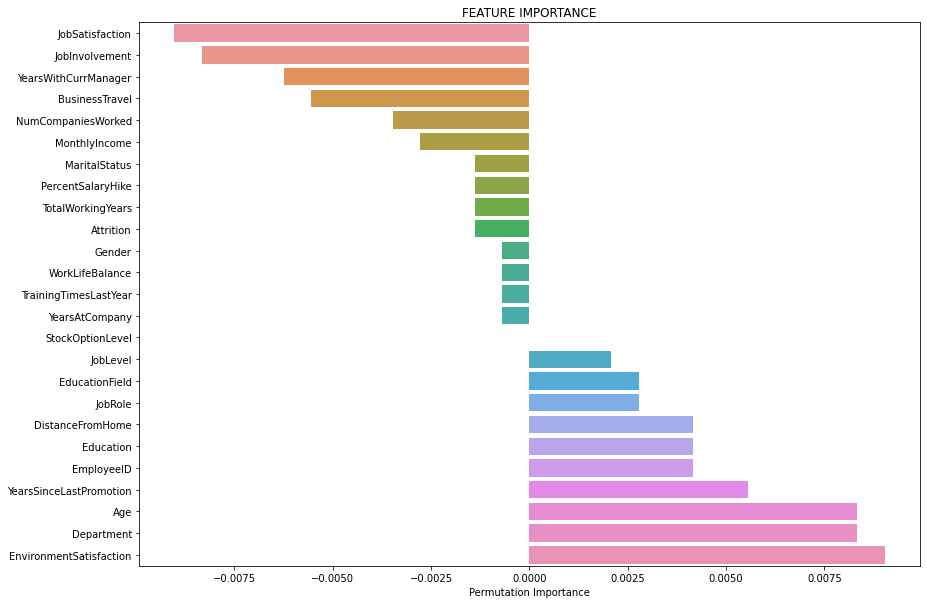

In [ ]:
cols = ['Age', 'Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EmployeeID', 'Gender', 'JobLevel',
       'JobRole', 'MaritalStatus', 'MonthlyIncome', 'NumCompaniesWorked',
       'PercentSalaryHike', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'YearsAtCompany', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'EnvironmentSatisfaction', 'JobSatisfaction',
       'WorkLifeBalance', 'JobInvolvement', 'PerformanceRating']
    
features = np.array(cols)
plt.figure(figsize = (14 ,10))    
sorted_idx = perm_importance.importances_mean.argsort()
sns.barplot( perm_importance.importances_mean[sorted_idx] ,features[sorted_idx] )
plt.xlabel("Permutation Importance")

plt.title('FEATURE IMPORTANCE')